In [1]:
# %pip install seaborn

import pandas as pd
import seaborn as sns

## Data Exploration

In [2]:
names = [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'income',
]
training_data = pd.read_csv('adult.data', names=names, skipinitialspace=True)
training_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Data Preprocessing

In [3]:
# Drop any rows with missing values
training_data = training_data.dropna()
# training_data["workclass"].value_counts()

# Normalizing the data 
most_common_workclass = training_data["workclass"].mode()[0]
most_common_occupation = training_data["occupation"].mode()[0]
most_common_country = training_data["native-country"].mode()[0]

training_data['workclass'].replace('?', most_common_workclass, inplace=True)
training_data['occupation'].replace('?', most_common_occupation, inplace=True)
training_data['native-country'].replace('?', most_common_country, inplace=True)

In [4]:
training_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Label Encoding

In [5]:
# %pip install scikit-learn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['workclass', 
                       'education', 
                       'marital-status', 
                       'occupation', 
                       'relationship', 
                       'race', 
                       'sex', 
                       'native-country', 
                       'income']

for col in categorical_columns:
    training_data[col] = label_encoder.fit_transform(training_data[col])

# Split the data into features (X) and target variable (y)
X = training_data.drop('income', axis=1)
y = training_data['income']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Classification Model

In [6]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
log_reg = LogisticRegression(max_iter=1000)

# Fit the model to the training data
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

## Pattern Extraction

In [7]:
# Get feature importance (coefficients)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': log_reg.fit(X_train, y_train).coef_[0]})
feature_importance = feature_importance.reindex(feature_importance['Importance'].abs().sort_values(ascending=False).index)

print("Feature Importance:\n", feature_importance)
# The larger the absolute value of the coefficient, the more impact that feature has on the prediction. Positive coefficients indicate a positive impact on the target class, while negative coefficients indicate a negative impact.

Feature Importance:
            Feature  Importance
13  native-country   -0.071273
7     relationship   -0.034686
5   marital-status   -0.031881
12  hours-per-week    0.030178
4    education-num    0.026221
1        workclass   -0.013469
3        education   -0.011705
6       occupation   -0.011262
0              age    0.009770
8             race   -0.008724
9              sex    0.005307
11    capital-loss    0.000759
10    capital-gain    0.000329
2           fnlwgt   -0.000002


In [8]:
# Get prediction probabilities for the test set
predicted_probabilities = log_reg.predict_proba(X_test)[:, 1]

# Display the predicted probabilities for the positive class
print("Prediction Probabilities for Positive Class:\n")
for item in predicted_probabilities:
    print(item)
# The output (predicted_probabilities) will contain the probabilities of the positive class for each sample in the test set. These probabilities indicate the model's confidence in predicting each sample as belonging to the positive class (e.g., income > $50K). Adjust the threshold using these probabilities based on your specific needs, such as tuning the trade-off between precision and recall or ROC curve analysis.

Prediction Probabilities for Positive Class:

0.16643362860080635
0.19227513082379202
0.26586577174976217
0.16507083410138232
0.35417455456712904
0.2693787291699506
0.9873413387199697
0.15751489644794756
0.17117945550621552
0.45717819431400925
0.1674043414120156
0.15691525087543653
0.18618268139858993
0.1852452334173105
0.11475925352001518
0.12011790584068466
0.5069986501085765
0.21925232477747061
0.7191694504923708
0.11992365934402105
0.24716793082112765
0.1707159967310305
0.21893721097406157
0.10727171816220434
0.24027830500959915
0.15462489734649829
0.18881978288311638
0.13886640240267825
0.22243236800456548
0.09299714496644773
0.6636468268584502
0.16608596116262378
0.11270528728045509
0.09081457736100795
0.14065237097817038
0.5084093742483067
0.08069432922603959
0.11019365124608824
0.5025323820002954
0.1270033937772243
0.1801881883276992
0.15606637797846143
0.999999999999988
0.12223121327390772
0.2931292569147289
0.19095846246858034
0.22784269328166096
0.06424127827514343
0.3113804

## Model Prediction

In [9]:
# Predictions on the test set
y_pred = log_reg.predict(X_test)

In [10]:
# Identify misclassified instances
misclassified_indices = y_test != y_pred
misclassified_samples = X_test[misclassified_indices]
misclassified_true_labels = y_test[misclassified_indices]
misclassified_predicted_labels = y_pred[misclassified_indices]

# Display misclassified instances and their true/predicted labels
misclassified_df = pd.DataFrame({
    'True Labels': misclassified_true_labels,
    'Predicted Labels': misclassified_predicted_labels
})
print("Misclassified Instances and Labels:\n", misclassified_df)
# Analyze misclassified instances to understand common characteristics or patterns contributing to incorrect predictions.

Misclassified Instances and Labels:
        True Labels  Predicted Labels
28868            1                 0
15382            1                 0
5121             1                 0
20010            1                 0
1959             1                 0
...            ...               ...
18121            1                 0
18123            1                 0
28935            1                 0
14741            1                 0
24534            1                 0

[1333 rows x 2 columns]


## Testing Dataset Preprocessing

In [11]:
names = [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'income',
]
data_test = pd.read_csv('adult.test', names=names, skipinitialspace=True)
data_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


In [12]:
# Drop any rows with missing values
data_test = data_test.dropna()

# Normalizing the data 
data_test= data_test[data_test.age !="|1x3 Cross validator"]

most_common_workclass = data_test["workclass"].mode()[0]
most_common_occupation = data_test["occupation"].mode()[0]
most_common_country = data_test["native-country"].mode()[0]

data_test['workclass'].replace('?', most_common_workclass, inplace=True)
data_test['occupation'].replace('?', most_common_occupation, inplace=True)
data_test['native-country'].replace('?', most_common_country, inplace=True)

data_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,Private,103497.0,Some-college,10.0,Never-married,Prof-specialty,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


## Label Encoding

In [13]:
# Encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
for col in categorical_columns:
    data_test[col] = label_encoder.fit_transform(data_test[col])

# Split the data into features (X) and target variable (y)
X = data_test.drop('income', axis=1)
y = data_test['income']

## Predict the income level with test dataset

In [14]:
# Predictions on the test set
y_pred = log_reg.predict(X)

## Model Performance Evaluation

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Report
report = classification_report(y, y_pred)
print("Classification Report:\n", report)

# Accuracy
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(y, y_pred)
print(f"Precision: {precision}")

# Recall
recall = recall_score(y, y_pred)
print(f"Recall: {recall}")

# F1-score
f1 = f1_score(y, y_pred)
print(f"F1-Score: {f1}")

# Confusion Matrix
conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87     12435
           1       0.62      0.30      0.41      3846

    accuracy                           0.79     16281
   macro avg       0.72      0.62      0.64     16281
weighted avg       0.77      0.79      0.76     16281

Accuracy: 0.791536146428352
Precision: 0.6211146838156485
Recall: 0.3013520540821633
F1-Score: 0.405812324929972
Confusion Matrix:
 [[11728   707]
 [ 2687  1159]]


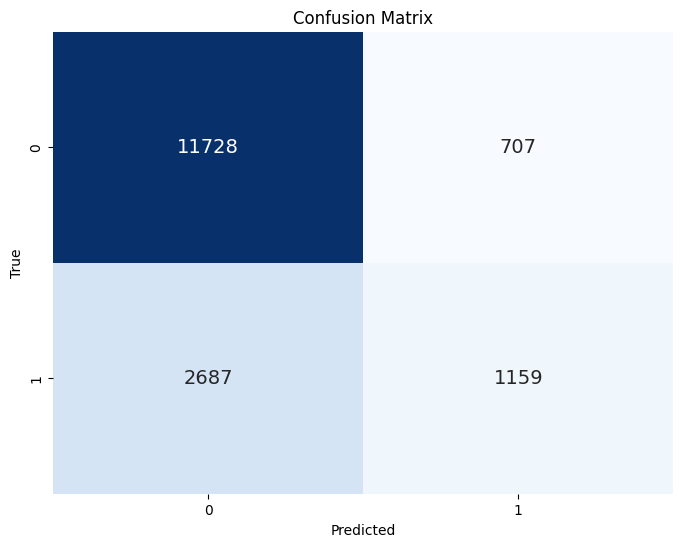

In [16]:
import matplotlib.pyplot as plt

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 14})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()